# Rangkuman Chapter 6: Decision Trees

## Berdasarkan buku "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"

Notebook ini berisi rangkuman lengkap Chapter 6 dengan implementasi Python untuk Decision Trees, termasuk Classification, Regression, CART algorithm, dan Regularization.

## 1. Pengenalan Decision Trees

**Decision Trees** adalah versatile ML algorithms yang capable untuk:
- **Classification** tasks
- **Regression** tasks
- **Multioutput** tasks

### Karakteristik:
- Powerful algorithms, capable fitting complex datasets
- Fundamental components dari **Random Forests** (Chapter 7)
- Intuitive dan easy to interpret (**white box models**)
- **No feature scaling required** (unlike SVM)

### Kelebihan:
- Simple to understand and interpret
- Easy to use
- Versatile (classification & regression)
- Powerful
- Little data preparation needed

### Kekurangan:
- Prone to overfitting
- Sensitive to training set rotation
- Sensitive to small variations in data
- Greedy algorithm (not guaranteed optimal)

## 2. Training dan Visualizing Decision Tree

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz

print("Libraries berhasil diimport!")

Libraries berhasil diimport!


In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

print("=== Iris Dataset ===")
print(f"Features: Petal length, Petal width")
print(f"Classes: {iris.target_names}")
print(f"Samples: {len(X)}")

=== Iris Dataset ===
Features: Petal length, Petal width
Classes: ['setosa' 'versicolor' 'virginica']
Samples: 150


In [3]:
# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

print("=== Decision Tree Classifier ===")
print("max_depth: 2")
print("Model trained!")

=== Decision Tree Classifier ===
max_depth: 2
Model trained!


### 2.1 Visualisasi Tree Structure

Tree structure dapat divisualisasi menggunakan `export_graphviz()` dan Graphviz tool.

**Node attributes**:
- **samples**: Jumlah training instances di node
- **value**: Jumlah instances per class di node
- **gini**: Impurity measure (0 = pure, 1 = maximum impurity)
- **class**: Predicted class untuk node

In [4]:
# Visualisasi tree structure (text-based)
from sklearn.tree import export_text

tree_rules = export_text(tree_clf, feature_names=['petal length (cm)', 'petal width (cm)'])
print("=== Decision Tree Rules ===")
print(tree_rules)

=== Decision Tree Rules ===
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



### 2.2 Making Predictions

**Prediction process**:
1. Start at root node
2. Test condition (e.g., petal length ≤ 2.45 cm)
3. Move to left child (if True) atau right child (if False)
4. Repeat until reaching leaf node
5. Return predicted class

**Example**: Flower dengan petal length 5 cm dan width 1.5 cm
- Root: petal length > 2.45 cm → go right
- Node: petal width < 1.75 cm → go left
- Leaf: Predict Iris versicolor

In [5]:
# Make predictions
sample = [[5, 1.5]]  # petal length=5cm, width=1.5cm

prediction = tree_clf.predict(sample)
probabilities = tree_clf.predict_proba(sample)

print("=== Prediction ===")
print(f"Input: Petal length=5cm, width=1.5cm")
print(f"\nPredicted class: {prediction[0]} ({iris.target_names[prediction[0]]})")
print(f"\nClass probabilities:")
for i, prob in enumerate(probabilities[0]):
    print(f"  {iris.target_names[i]}: {prob:.4f}")

=== Prediction ===
Input: Petal length=5cm, width=1.5cm

Predicted class: 1 (versicolor)

Class probabilities:
  setosa: 0.0000
  versicolor: 0.9074
  virginica: 0.0926


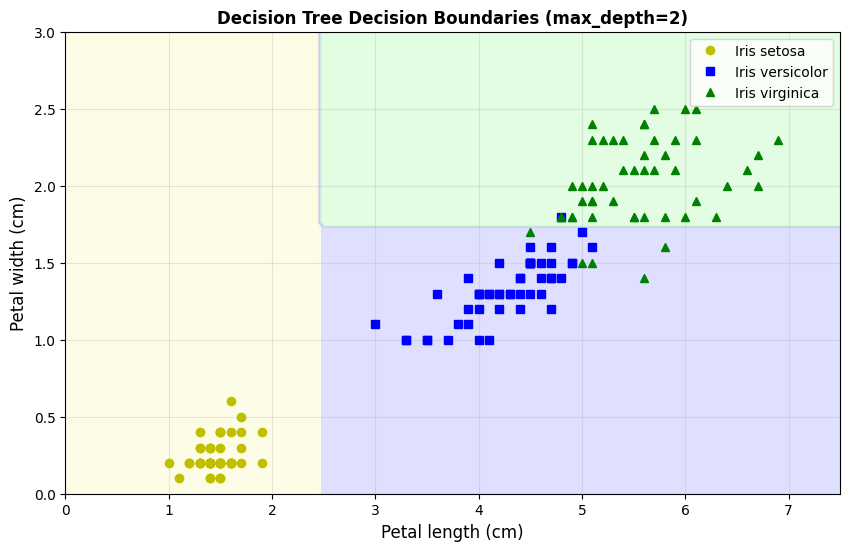

Decision boundaries are orthogonal (perpendicular to axes)


In [6]:
# Visualisasi decision boundaries
def plot_decision_boundary(clf, X, y, axes, alpha=1.0):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_clf, X, y, axes=[0, 7.5, 0, 3])
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
plt.xlabel("Petal length (cm)", fontsize=12)
plt.ylabel("Petal width (cm)", fontsize=12)
plt.title("Decision Tree Decision Boundaries (max_depth=2)", fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Decision boundaries are orthogonal (perpendicular to axes)")

## 3. CART Training Algorithm

**CART (Classification and Regression Tree)** algorithm yang digunakan Scikit-Learn.

### 3.1 How CART Works

1. **Split**: Cari feature k dan threshold tₖ yang produces purest subsets
2. **Cost function** untuk classification:

\\[ J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right} \\]

3. **Recursive splitting**: Repeat process pada subsets
4. **Stop conditions**: max_depth, min_samples_split, dll

### 3.2 Gini Impurity

**Gini impurity** measures node purity:

\\[ G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2 \\]

- \\( p_{i,k} \\): ratio of class k instances in node i
- \\( G_i = 0 \\): pure node (all instances same class)
- \\( G_i \\) maximum: equally distributed classes

**Example**: Node dengan 49 versicolor, 5 virginica (total 54)
\\[ G = 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 \approx 0.168 \\]

### 3.3 Entropy (Alternative Impurity Measure)

**Entropy** adalah alternative untuk Gini impurity:

\\[ H_i = -\sum_{k=1, p_{i,k} \neq 0}^{n} p_{i,k} \log_2(p_{i,k}) \\]

**Comparison**:
- **Gini impurity**: Slightly faster to compute (default)
- **Entropy**: Tends to produce more balanced trees
- Most of the time: Similar results

In [7]:
# Compare Gini vs Entropy
tree_clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
tree_clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)

tree_clf_gini.fit(X, y)
tree_clf_entropy.fit(X, y)

print("=== Gini vs Entropy ===")
print(f"Gini tree depth: {tree_clf_gini.get_depth()}")
print(f"Entropy tree depth: {tree_clf_entropy.get_depth()}")
print(f"\nGini tree leaves: {tree_clf_gini.get_n_leaves()}")
print(f"Entropy tree leaves: {tree_clf_entropy.get_n_leaves()}")
print("\nBoth produce similar trees dalam most cases")

=== Gini vs Entropy ===
Gini tree depth: 3
Entropy tree depth: 3

Gini tree leaves: 5
Entropy tree leaves: 5

Both produce similar trees dalam most cases


### 3.4 Computational Complexity

**Prediction**: O(log₂(m)) - fast!
- Traverse tree dari root ke leaf
- Approximately balanced tree
- Independent dari number of features

**Training**: O(n × m log₂(m))
- Compare all features pada all samples at each node
- Can be slow untuk large datasets
- presort=True dapat speed up untuk small datasets (<few thousand)

**Note**: Finding optimal tree adalah NP-Complete problem → CART uses greedy approach

## 4. Regularization Hyperparameters

Decision Trees membuat **very few assumptions** tentang data → prone to overfitting jika unrestricted.

### 4.1 Key Hyperparameters

**Restrict tree structure**:
- **max_depth**: Maximum depth of tree (default: None/unlimited)
- **min_samples_split**: Minimum samples required to split node (default: 2)
- **min_samples_leaf**: Minimum samples required at leaf node (default: 1)
- **min_weight_fraction_leaf**: Same as min_samples_leaf tapi as fraction
- **max_leaf_nodes**: Maximum number of leaf nodes
- **max_features**: Maximum features evaluated for splitting

**Rule of thumb**:
- **Increase** min_* hyperparameters → more regularization
- **Reduce** max_* hyperparameters → more regularization

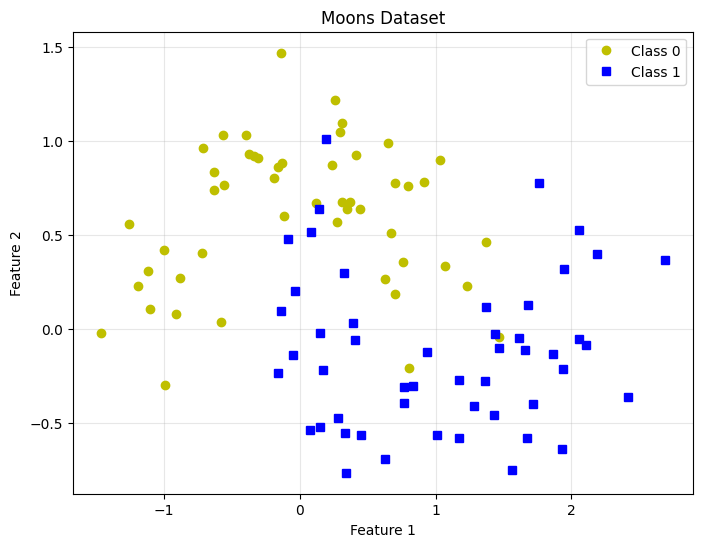

In [8]:
# Generate moons dataset
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=100, noise=0.25, random_state=42)

plt.figure(figsize=(8, 6))
plt.plot(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], "yo", label="Class 0")
plt.plot(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], "bs", label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moons Dataset")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

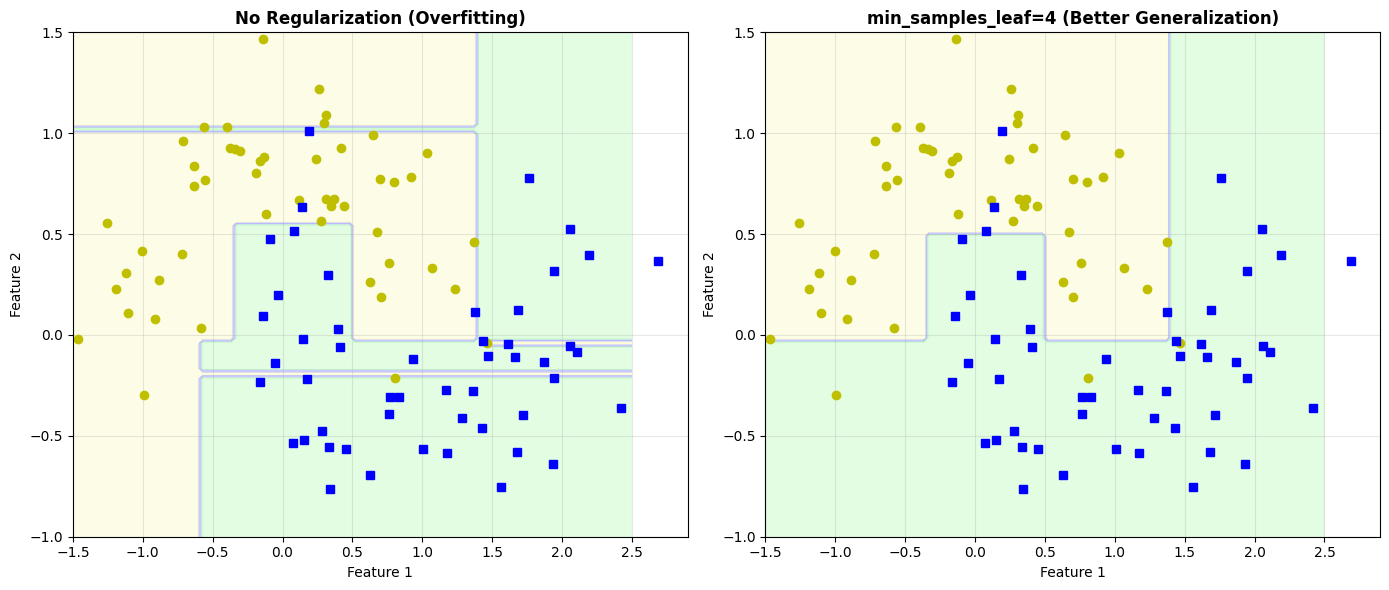


Observasi:
- Left: Overfitting, decision boundary too complex
- Right: Better generalization dengan regularization


In [9]:
# Compare models: No regularization vs Regularization
tree_clf_unreg = DecisionTreeClassifier(random_state=42)
tree_clf_reg = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

tree_clf_unreg.fit(X_moons, y_moons)
tree_clf_reg.fit(X_moons, y_moons)

plt.figure(figsize=(14, 6))

# Plot 1: No regularization
plt.subplot(1, 2, 1)
plot_decision_boundary(tree_clf_unreg, X_moons, y_moons, axes=[-1.5, 2.5, -1, 1.5])
plt.plot(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], "yo")
plt.plot(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], "bs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("No Regularization (Overfitting)", fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 2: With regularization
plt.subplot(1, 2, 2)
plot_decision_boundary(tree_clf_reg, X_moons, y_moons, axes=[-1.5, 2.5, -1, 1.5])
plt.plot(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], "yo")
plt.plot(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], "bs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("min_samples_leaf=4 (Better Generalization)", fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservasi:")
print("- Left: Overfitting, decision boundary too complex")
print("- Right: Better generalization dengan regularization")

### 4.2 Pruning

**Alternative approach** untuk regularization:
1. Train Decision Tree tanpa restrictions
2. **Prune** (delete) unnecessary nodes
3. Node unnecessary jika purity improvement tidak statistically significant
4. Use statistical tests (e.g., χ² test, p-value)
5. Continue pruning until all unnecessary nodes removed

**Note**: Scikit-Learn tidak support pruning (use max_depth, min_* instead)

## 5. Regression

Decision Trees juga capable performing **regression tasks**!

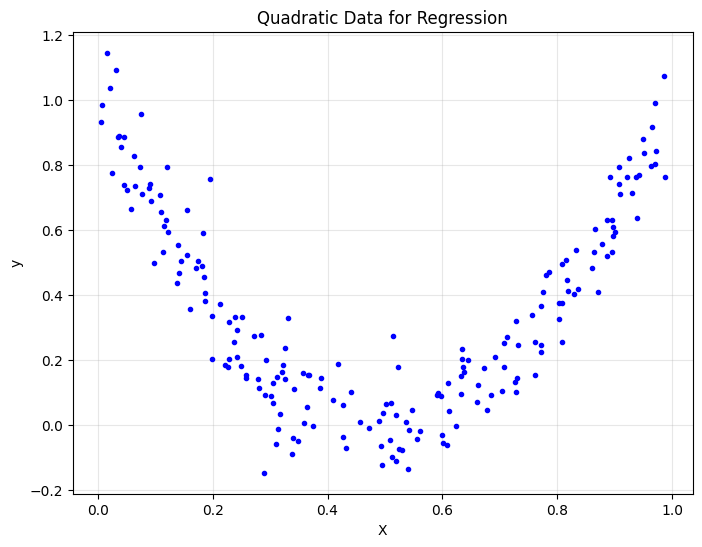

In [10]:
# Generate quadratic data
np.random.seed(42)
m = 200
X_reg = np.random.rand(m, 1)
y_reg = 4 * (X_reg - 0.5) ** 2 + np.random.randn(m, 1) / 10

plt.figure(figsize=(8, 6))
plt.plot(X_reg, y_reg, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Quadratic Data for Regression")
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
# Train Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_reg, y_reg)

print("=== Decision Tree Regressor ===")
print("max_depth: 2")
print("Model trained!")

=== Decision Tree Regressor ===
max_depth: 2
Model trained!


### 5.1 How Regression Tree Works

**Key difference**: Instead of predicting class, predicts **value**.

**Prediction process**:
1. Traverse tree to find leaf node
2. Return **average target value** dari training instances di leaf node

**CART cost function untuk regression**:

\\[ J(k, t_k) = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right} \\]

where:

\\[ MSE_{node} = \frac{1}{m_{node}} \sum_{i \in node} (\bar{y}_{node} - y^{(i)})^2 \\]

\\[ \bar{y}_{node} = \frac{1}{m_{node}} \sum_{i \in node} y^{(i)} \\]

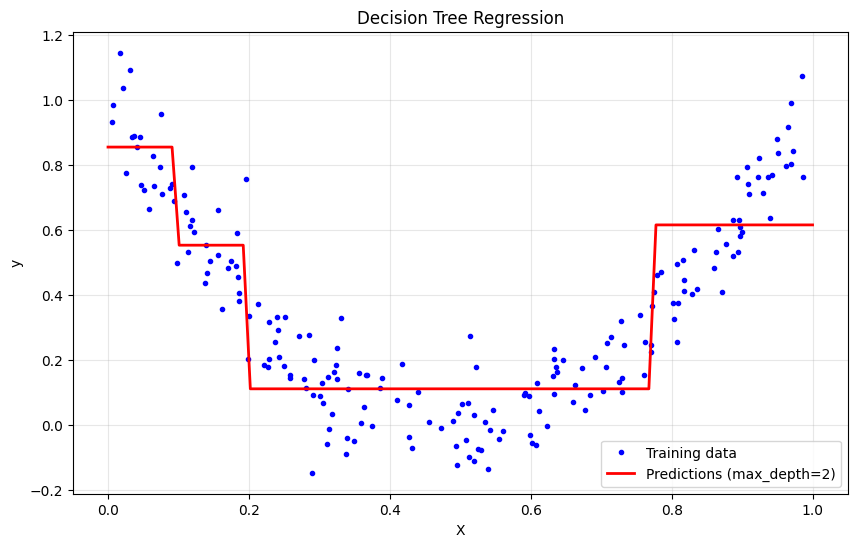

Each region has constant predicted value (average of training instances)


In [12]:
# Visualisasi predictions
X_new = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = tree_reg.predict(X_new)

plt.figure(figsize=(10, 6))
plt.plot(X_reg, y_reg, "b.", label="Training data")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predictions (max_depth=2)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Each region has constant predicted value (average of training instances)")

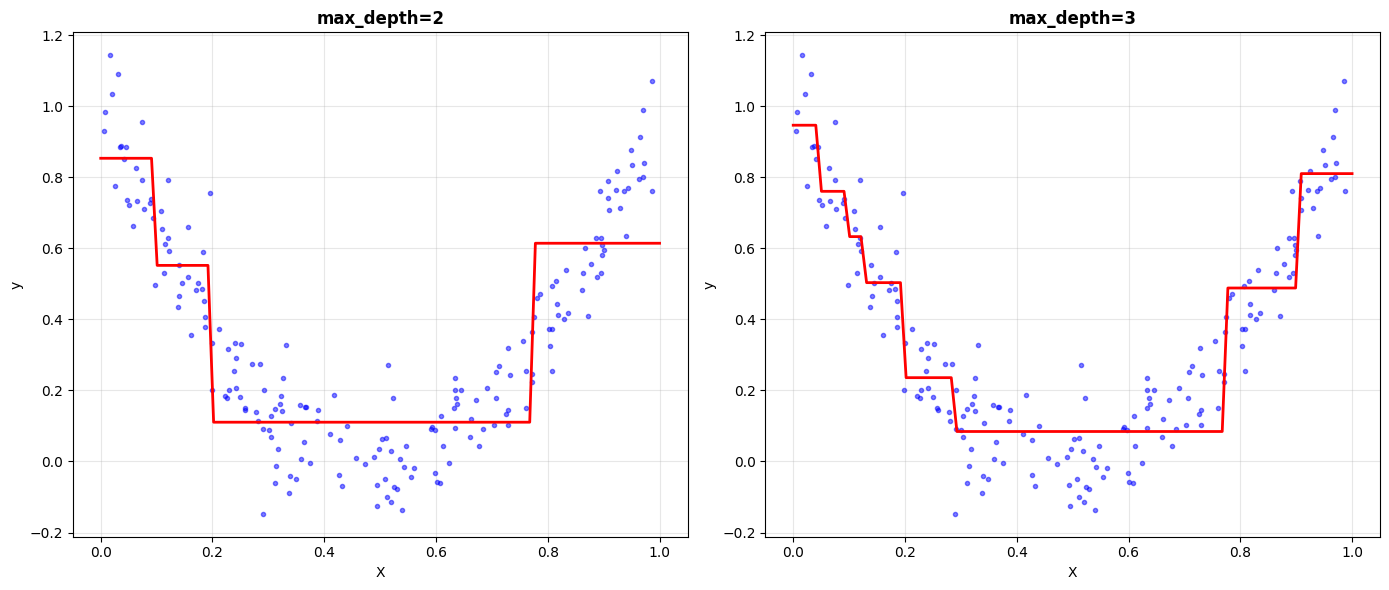

More depth → More regions → Better fit (but risk overfitting)


In [13]:
# Compare max_depth values
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_reg, y_reg)

y_pred2 = tree_reg2.predict(X_new)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(X_reg, y_reg, "b.", alpha=0.5)
plt.plot(X_new, y_pred, "r-", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("max_depth=2", fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(X_reg, y_reg, "b.", alpha=0.5)
plt.plot(X_new, y_pred2, "r-", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("max_depth=3", fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("More depth → More regions → Better fit (but risk overfitting)")

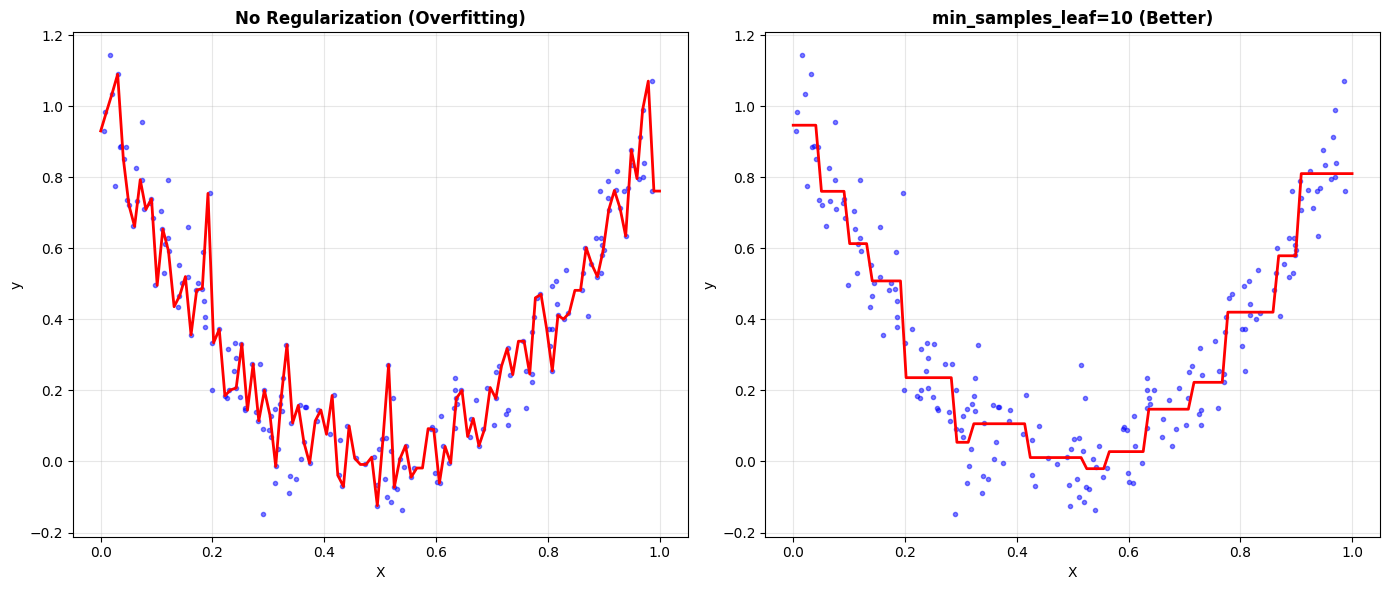


Observasi:
- Left: Overfitting badly, too many splits
- Right: Much more reasonable dengan regularization


In [14]:
# Regularization example
tree_reg_unreg = DecisionTreeRegressor(random_state=42)
tree_reg_reg = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

tree_reg_unreg.fit(X_reg, y_reg)
tree_reg_reg.fit(X_reg, y_reg)

y_pred_unreg = tree_reg_unreg.predict(X_new)
y_pred_reg = tree_reg_reg.predict(X_new)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(X_reg, y_reg, "b.", alpha=0.5)
plt.plot(X_new, y_pred_unreg, "r-", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("No Regularization (Overfitting)", fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(X_reg, y_reg, "b.", alpha=0.5)
plt.plot(X_new, y_pred_reg, "r-", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("min_samples_leaf=10 (Better)", fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservasi:")
print("- Left: Overfitting badly, too many splits")
print("- Right: Much more reasonable dengan regularization")

## 6. Instability

Decision Trees memiliki beberapa **limitations**:

### 6.1 Orthogonal Decision Boundaries

Decision Trees **love orthogonal boundaries** (perpendicular to axes):
- Makes them **sensitive to training set rotation**
- Simple linearly separable data dapat produce convoluted boundaries setelah rotation
- **Solution**: Use PCA (Chapter 8) untuk better orientation

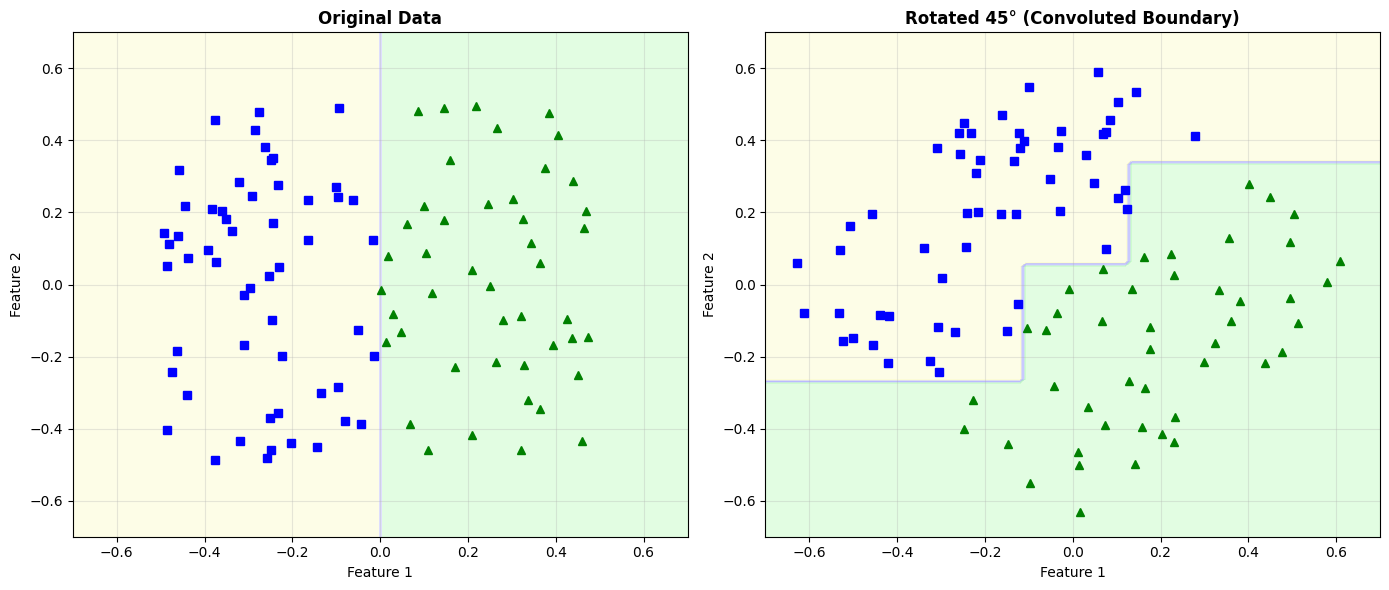


Observasi:
- Left: Simple decision boundary (one split)
- Right: Convoluted boundary after rotation
- Both fit training set perfectly, but right may not generalize well


In [15]:
# Demonstrate rotation sensitivity
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32)

# Rotated version
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                             [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

# Train models
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7])
plt.plot(Xs[ys==0, 0], Xs[ys==0, 1], "bs")
plt.plot(Xs[ys==1, 0], Xs[ys==1, 1], "g^")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data", fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7])
plt.plot(Xsr[ys==0, 0], Xsr[ys==0, 1], "bs")
plt.plot(Xsr[ys==1, 0], Xsr[ys==1, 1], "g^")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Rotated 45° (Convoluted Boundary)", fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservasi:")
print("- Left: Simple decision boundary (one split)")
print("- Right: Convoluted boundary after rotation")
print("- Both fit training set perfectly, but right may not generalize well")

### 6.2 Sensitivity to Data Variations

**Main issue**: Decision Trees **very sensitive to small variations** dalam training data.

**Causes**:
- Removing single instance dapat change entire tree structure
- Stochastic training algorithm → different models even dengan same data

**Solution**: **Random Forests** (Chapter 7)
- Average predictions over many trees
- Limit instability
- More robust

## 7. Summary & Best Practices

### When to Use Decision Trees:
- Need interpretable model (white box)
- Little data preparation available
- No feature scaling needed
- Classification atau regression tasks
- Multioutput tasks

### Key Concepts:

**Training Algorithm (CART)**:
- Greedy algorithm
- Binary splits only (yes/no questions)
- Minimizes Gini impurity (atau entropy) untuk classification
- Minimizes MSE untuk regression

**Impurity Measures**:
- **Gini impurity**: Default, slightly faster
- **Entropy**: More balanced trees, slower

**Regularization Hyperparameters**:
- **max_depth**: Most common regularization
- **min_samples_split**: Minimum samples untuk split
- **min_samples_leaf**: Minimum samples at leaf
- **max_leaf_nodes**: Maximum leaf nodes
- **max_features**: Maximum features untuk splitting

**Predictions**:
- Classification: Return majority class di leaf
- Regression: Return average value di leaf
- Can estimate probabilities

### Advantages:
✓ Easy to interpret (white box)
✓ Little data preparation
✓ No feature scaling needed
✓ Fast predictions O(log₂(m))
✓ Classification & regression

### Disadvantages:
✗ Prone to overfitting
✗ Sensitive to rotation
✗ Sensitive to data variations
✗ Orthogonal boundaries only
✗ Not guaranteed optimal

### Important Notes:
- **Always regularize** Decision Trees
- Use **max_depth** sebagai starting point
- **Cross-validation** untuk find best hyperparameters
- Consider **Random Forests** untuk more robust models
- Decision Trees are **building blocks** untuk ensemble methods

## Kesimpulan

Chapter 6 memberikan comprehensive understanding tentang Decision Trees:

✓ **Training & Visualization**: DecisionTreeClassifier, tree structure, making predictions

✓ **CART Algorithm**: Greedy algorithm, binary splits, cost functions

✓ **Impurity Measures**: Gini impurity dan entropy

✓ **Regularization**: max_depth, min_samples_split, min_samples_leaf, dll

✓ **Regression**: DecisionTreeRegressor, MSE minimization

✓ **Computational Complexity**: O(log₂(m)) predictions, O(n × m log₂(m)) training

✓ **Instability**: Sensitivity to rotation dan data variations

✓ **White Box Models**: Easy to interpret, simple classification rules

Decision Trees adalah **powerful dan versatile** algorithms yang fundamental dalam ML. Meskipun memiliki limitations (overfitting, instability), Decision Trees adalah **building blocks** untuk ensemble methods seperti Random Forests yang akan dibahas di Chapter 7.

---
